<a href="https://colab.research.google.com/github/bozhenkaaa/technOfMachineLearning1/blob/main/%D0%94%D0%971.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yaaryiitturan/pendigits")

print("Path to dataset files:", path)
path = "/root/.cache/kagglehub/datasets/yaaryiitturan/pendigits/versions/1"
df = pd.read_csv(os.path.join(path, "pendigits_txt.csv"), skiprows=1, header=None)
df

Path to dataset files: /kaggle/input/pendigits


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [8]:
# X — ознаки, y — цільова змінна
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальну і тестову вибірку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
### Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)

In [11]:
### Random Forest
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

In [12]:
### Оцінка результатів
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("=== Decision Tree ===")
print("Best Params:", grid_dt.best_params_)
print("Accuracy:", acc_dt)
print(classification_report(y_test, y_pred_dt))

print("\n=== Random Forest ===")
print("Best Params:", grid_rf.best_params_)
print("Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

=== Decision Tree ===
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9654388358344702
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       241
           1       0.94      0.93      0.94       225
           2       0.95      0.97      0.96       235
           3       0.97      0.97      0.97       224
           4       0.99      0.97      0.98       215
           5       0.96      0.98      0.97       213
           6       0.98      0.97      0.98       199
           7       0.96      0.96      0.96       209
           8       0.95      0.98      0.97       212
           9       0.97      0.95      0.96       226

    accuracy                           0.97      2199
   macro avg       0.97      0.97      0.97      2199
weighted avg       0.97      0.97      0.97      2199


=== Random Forest ===
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_esti

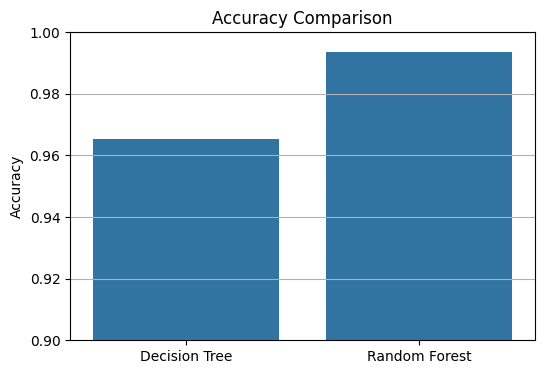

In [18]:
### Візуалізація точності
plt.figure(figsize=(6, 4))
sns.barplot(x=["Decision Tree", "Random Forest"], y=[acc_dt, acc_rf])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.grid(True, axis='y')
plt.show()

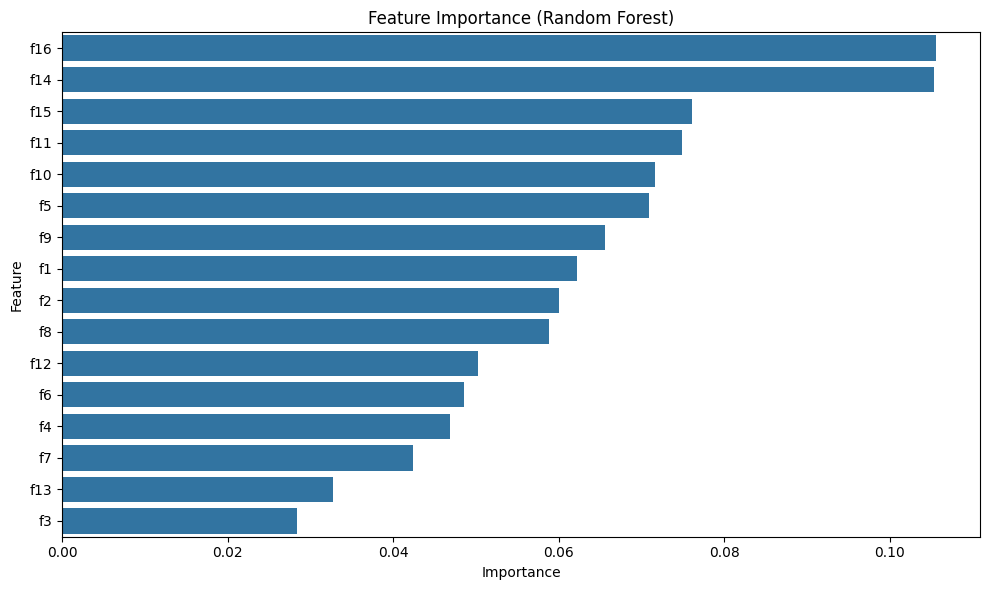

In [17]:
### Візуалізація важливості ознак (Random Forest)
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [f"f{i+1}" for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

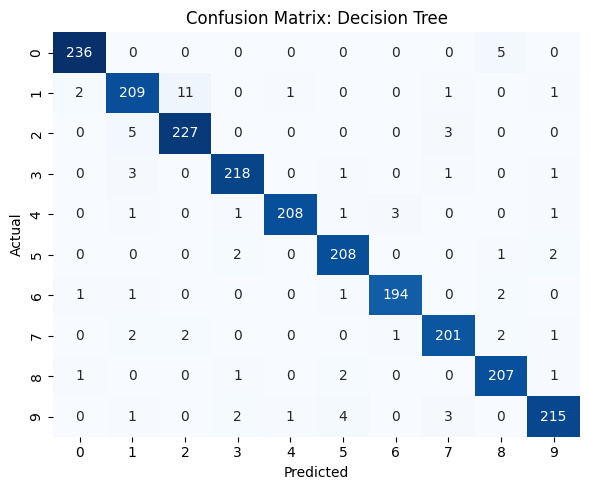

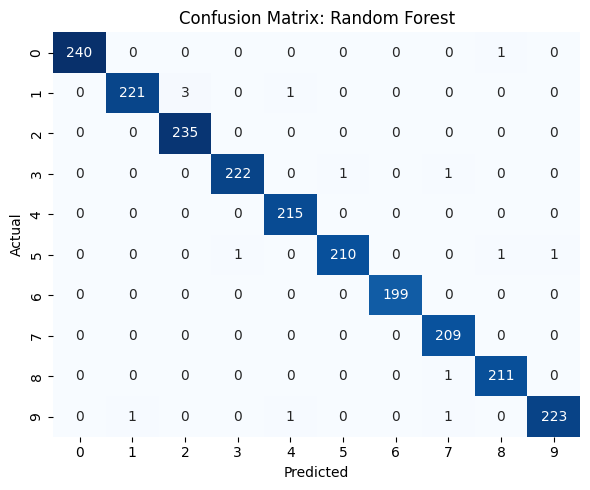

In [15]:
### Матриці плутанини
def plot_confusion(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()

plot_confusion(confusion_matrix(y_test, y_pred_dt), "Confusion Matrix: Decision Tree")
plot_confusion(confusion_matrix(y_test, y_pred_rf), "Confusion Matrix: Random Forest")